In [1]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize as moo_minimize
from pymoo.factory import get_problem
from pymoode.nsde import NSDE
from pymoode.gde3 import GDE3
from pymoode.survivors import RankSurvival

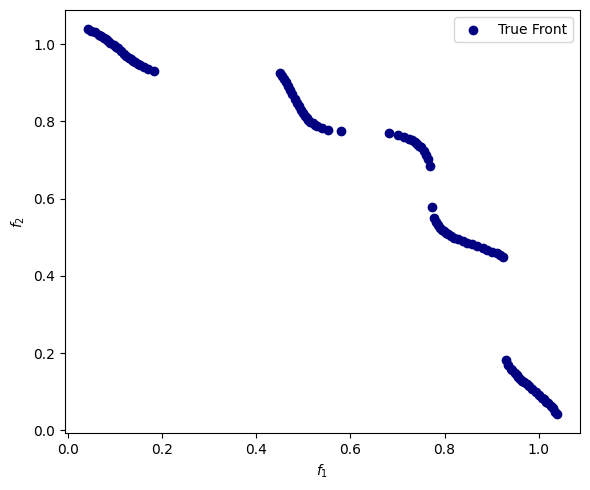

In [2]:
from pymoo.factory import get_problem

problem = get_problem("tnk")
pf = problem.pareto_front()

fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [3]:
problem.__dict__

{'n_var': 2,
 'n_obj': 2,
 'n_constr': 2,
 'data': {'type_var': numpy.float64},
 'xl': array([0.e+00, 1.e-30]),
 'xu': array([3.14159265, 3.14159265]),
 'callback': None,
 'check_inconsistencies': True,
 'replace_nan_values_by': inf,
 'exclude_from_serialization': [],
 '_pareto_set': <pymoo.util.cache.Cache at 0x240ca534af0>,
 '_pareto_front': <pymoo.util.cache.Cache at 0x240ca534fa0>,
 '_ideal_point': None,
 '_nadir_point': None}

In [4]:
lhs = LatinHypercubeSampling()

In [5]:
NGEN = 250
POPSIZE = 50
SEED = 5

In [6]:
gde3 = GDE3(pop_size=POPSIZE, CR=0.3, F=(0.0, 1.0), variant="DE/rand/1/bin", SA=0.5, sampling=lhs, repair="bounce-back",
            survival=RankSurvival(rule="full", crowding_func="cd"))

res_gde3 = moo_minimize(problem,
                        gde3,
                        ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      50 |  0.00000E+00 |  6.953353946 |  0.542703323 |  0.232312740 |  0.013916982
    2 |     100 |  0.00000E+00 |  5.118852399 |  0.364412729 |  0.169706722 |  0.070377431
    3 |     150 |  0.00000E+00 |  3.788744069 |  0.355172292 |  0.204063798 |  0.070377431
    4 |     200 |  0.00000E+00 |  1.877995488 |  0.295901704 |  0.089089412 |  0.129022888
    5 |     250 |  0.00000E+00 |  1.243048732 |  0.165094998 |  0.124895451 |  0.133838404
    6 |     300 |  0.00000E+00 |  0.770449058 |  0.146618821 |  0.094413935 |  0.163971435
    7 |     350 |  0.00000E+00 |  0.569182907 |  0.086859609 |  0.074535166 |  0.186760030
    8 |     400 |  0.00000E+00 |  0.078017480 |  0.069208987 |  0.056472220 |  0.204043895
    9 |     450 |  0.00000E+00 |  0.024575088 |  0.068257057 |  0.060034219 |  0.210148474
   10 |     500 |  0.00000E+00 |  0.002795853 |  0.068143651 |  0.055336216 |  0.225511150

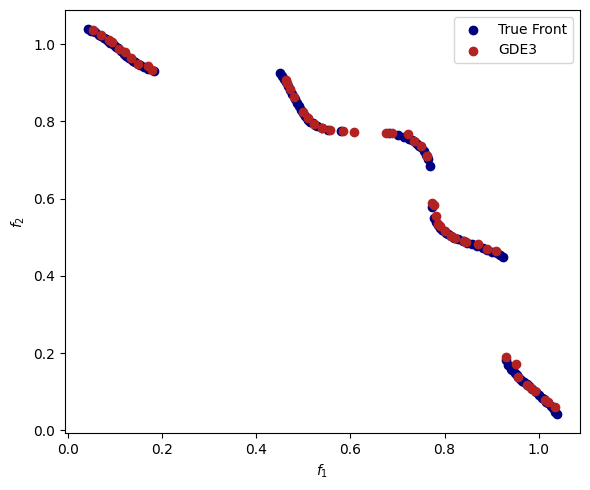

In [7]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], color="firebrick", label="GDE3")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [8]:
%%time
nsga2 = NSGA2(pop_size=POPSIZE, sampling=lhs, survival=RankSurvival(rule="full", crowding_func="cd"))

res_nsga2 = moo_minimize(problem,
                         nsga2,
                         ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      50 |  0.00000E+00 |  6.953353946 |  0.542703323 |  0.232312740 |  0.013916982
    2 |     100 |  0.00000E+00 |  1.066024142 |  0.325334084 |  0.187192948 |  0.050867530
    3 |     150 |  0.00000E+00 |  0.084604765 |  0.211503872 |  0.048149751 |  0.175101922
    4 |     200 |  0.00000E+00 |  0.00000E+00 |  0.209304626 |  0.066601777 |  0.176068820
    5 |     250 |  0.00000E+00 |  0.00000E+00 |  0.179139201 |  0.075520185 |  0.184178182
    6 |     300 |  0.00000E+00 |  0.00000E+00 |  0.170019142 |  0.059944380 |  0.185053819
    7 |     350 |  0.00000E+00 |  0.00000E+00 |  0.160471442 |  0.050880534 |  0.194824704
    8 |     400 |  0.00000E+00 |  0.00000E+00 |  0.105130420 |  0.047723667 |  0.196476684
    9 |     450 |  0.00000E+00 |  0.00000E+00 |  0.094918495 |  0.046218201 |  0.223801046
   10 |     500 |  0.00000E+00 |  0.00000E+00 |  0.086218972 |  0.038658566 |  0.232179869

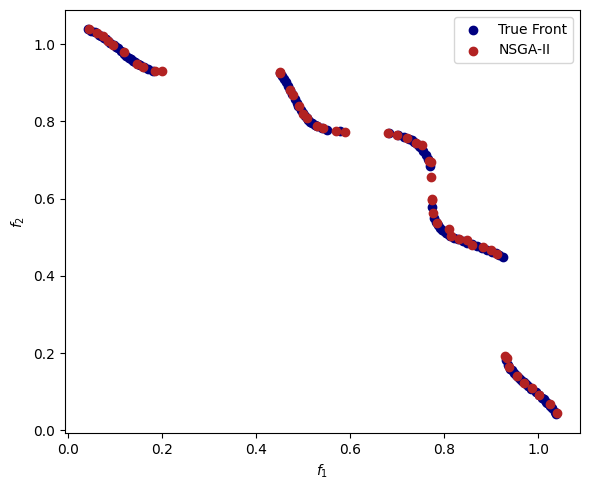

In [9]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_nsga2.F[:, 0], res_nsga2.F[:, 1], color="firebrick", label="NSGA-II")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [10]:
%%time
nsde = NSDE(pop_size=POPSIZE, CR=0.5, F=(0.0, 1.0), variant="DE/rand/1/bin", SA=0.5, sampling=lhs, repair="bounce-back",
            survival=RankSurvival(rule="full", crowding_func="cd"))
    
res_nsde = moo_minimize(problem,
                        nsde,
                        ('n_gen', NGEN),
                        seed=SEED,
                        save_history=True,
                        verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      50 |  0.00000E+00 |  6.953353946 |  0.542703323 |  0.232312740 |  0.013916982
    2 |     100 |  0.00000E+00 |  1.794525890 |  0.362458165 |  0.163109674 |  0.079264905
    3 |     150 |  0.00000E+00 |  0.452409389 |  0.275730448 |  0.143745391 |  0.091045170
    4 |     200 |  0.00000E+00 |  0.116555416 |  0.171818447 |  0.061598898 |  0.163597300
    5 |     250 |  0.00000E+00 |  0.026141847 |  0.142516327 |  0.047776558 |  0.191269987
    6 |     300 |  0.00000E+00 |  0.00000E+00 |  0.120255147 |  0.044427906 |  0.206507321
    7 |     350 |  0.00000E+00 |  0.00000E+00 |  0.115101581 |  0.048231064 |  0.208301275
    8 |     400 |  0.00000E+00 |  0.00000E+00 |  0.079439285 |  0.037500393 |  0.232507038
    9 |     450 |  0.00000E+00 |  0.00000E+00 |  0.078799839 |  0.036803759 |  0.232607246
   10 |     500 |  0.00000E+00 |  0.00000E+00 |  0.073286538 |  0.034175181 |  0.242270568

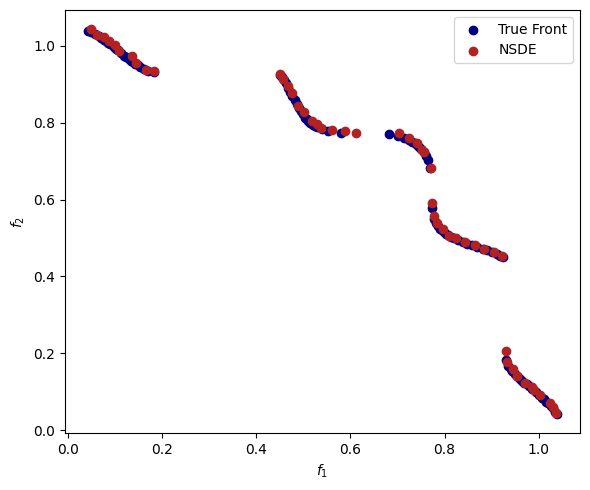

In [11]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_nsde.F[:, 0], res_nsde.F[:, 1], color="firebrick", label="NSDE")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()